<a href="https://colab.research.google.com/github/ccarpenterg/LearningTensorFlow2.0/blob/master/Gettingstarted_TensorFlow2_0-2_Plotting_Accuracy_Loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Plotting Accuracy and Loss for CNNs with TensorFlow

So now that we have trained a convnet, we will plot the accuracy and loss of our neural network. These plots will be very useful when we start studying the concepts of underfitting and, specially, overfitting.

In [0]:
!pip install tensorflow==2.0.0-alpha0

After the installation is complete, we import some standard Python libraries, the tensorflow framework and some keras modules. In the end, we check we're using the right tensorflow version, which should be 2.0.0-alpha0:

In [0]:
#import print function from future
from __future__ import absolute_import, division, print_function, unicode_literals

import os

#import TensorFlow and check version
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

print(tf.__version__)

2.0.0-alpha0


**MNIST Dataset**

So we'll be using the MNIST dataset again:

In [0]:
mnist = datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [0]:
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))


In [0]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

But now we'll be recording the model's history of loss and accuracy through a Python variable called ***history***:

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train,
                    y_train,
                    epochs=15,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 48s 807us/sample - loss: 0.1510 - accuracy: 0.9528 - val_loss: 0.0447 - val_accuracy: 0.9857
Epoch 2/15
60000/60000 [==============================] - 48s 808us/sample - loss: 0.0482 - accuracy: 0.9846 - val_loss: 0.0441 - val_accuracy: 0.9869
Epoch 3/15
60000/60000 [==============================] - 45s 752us/sample - loss: 0.0353 - accuracy: 0.9891 - val_loss: 0.0326 - val_accuracy: 0.9895
Epoch 4/15
60000/60000 [==============================] - 48s 794us/sample - loss: 0.0279 - accuracy: 0.9913 - val_loss: 0.0313 - val_accuracy: 0.9898
Epoch 5/15
60000/60000 [==============================] - 45s 744us/sample - loss: 0.0206 - accuracy: 0.9933 - val_loss: 0.0341 - val_accuracy: 0.9891
Epoch 6/15
60000/60000 [==============================] - 46s 768us/sample - loss: 0.0166 - accuracy: 0.9947 - val_loss: 0.0315 - val_accuracy: 0.9910
Epoch 7/15
60000/60000 [====================

As you can see the history contains the different metrics for each of the epochs:

In [0]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

We then access each metric (accuracy, val_accuracy, loss, val_loss), and plot them using pyplot from the matplotlib library:

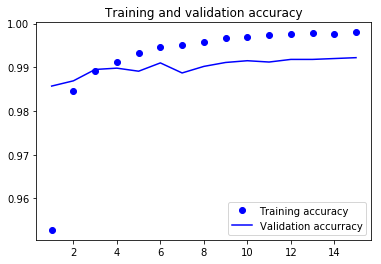

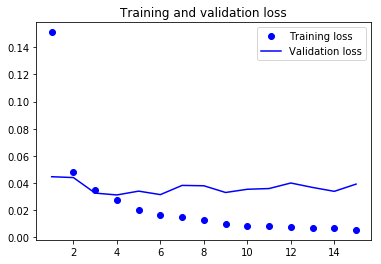

In [0]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b',label='Validation accurracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


Now you can see that the model is overfitting after the 4th epoch. So stopping the training at that point would've been a good decision.